### Create directory and upload urls file into your server

In [1]:
from fastai import *
from fastai.vision import *
%load_ext autoreload
%autoreload 2

## Download images

In [2]:
# Data Hirerachy, want to build two classifier, first only classify igneous/sedimentary/metamorphic, second will classify which rock type it is, ie. granite/non-granite/whateveritis....
# I get the hirerachy from https://geology.com/rocks/ and scrape image from google
# source 

In [3]:
search_dict = {
    'Igneous Rock': [
        'Andesite',
        'Basalt',
        'Dacite',
        'Quartz',
        'Diorite',
        'Gabbro',
        'Granite',
        'Obsidian',
        'Pegmatite',
        'Peridotite',
        'Pumice',
        'Rhyolite',
        'Scoria',
        'Tuff',
        'Unakite ',
    ],
    'Metamorphic Rock': [
        'Amphibolite',
        'Gneiss',
        'Gneiss',
        'Hornfels',
        'Lapis Lazuli',
        'Marble',
        'Mariposite',
        'Novaculite',
        'Phyllite',
        'Quartzite ',
        'Schist',
        'Skarn',
        'Slate',
        'Soapstone ',
    ],
    'Sedimentary Rock': [
        'Breccia',
        'Caliche',
        'Caliche',
        'Chert',
        'Coal Rock',
        'Conglomerate ',
        'Diatomite',
        'Dolomite',
        'Flint',
        'Iron Ore',
        'Limestone',
        'Oil Sands',
        'Rock Salt',
        'Sandstone',
        'Shale',
        'Siltstone',
    ]
}

In [4]:
import requests
from bs4 import BeautifulSoup
import urllib
import json

In [5]:
def get_search_string_dict(search_dict):
    
    search_string_dict = {}
    
    for key, keywords_list in search_dict.items():
        for i, keyword in enumerate(keywords_list):
            tmp = keywords_list[i]
            tmp_list = keywords_list.copy()
            tmp_list.remove(tmp_list[i])
        
            search_string = tmp + ' -' + ' -'.join([f'"{keyword}"' for keyword in tmp_list]) + f' :"{key}"' # to make precise search, filter unwanted result, and give good context
            search_string_dict[keyword] = search_string
    return search_string_dict

In [6]:
def get_page(search_string):
    base_url = 'https://www.google.com/search?tbm=isch&q='
    header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"
    }
    page = requests.request('GET', base_url + search_string, headers=header)
    return page

In [7]:
def extract_text(x):
    return dict(json.loads(x.text))['ou']

In [8]:
def get_images_urls(page):
    soup = BeautifulSoup(page.content, "lxml")
    html = soup.select('.rg_di .rg_meta')
    urls =  list(map(extract_text, html))
    return urls      

In [149]:
search_string_dict = get_search_string_dict(search_dict);

In [254]:
classes = []
for key in search_string_dict.keys():
    classes.append(key)
classes[-2:]
    

['Shale', 'Siltstone']

In [209]:
search_string_dict[classes[0]] # a sample search string

'Andesite -"Basalt" -"Dacite" -"Quartz" -"Diorite" -"Gabbro" -"Granite" -"Obsidian" -"Pegmatite" -"Peridotite" -"Pumice" -"Rhyolite" -"Scoria" -"Tuff" -"Unakite " :"Igneous Rock"'

In [ ]:
path = Path('data/rocks')
path.mkdir(exist_ok=True)

In [156]:
for bar,key in enumerate(progress_bar(classes)):
    
    search_string_base = search_string_dict[key]
    urls_list = []
    for i in range(1,10):
        x = f'&ijn={i}&start={i}00'
        x = search_string_base + x;
        x = get_page(x)

        urls = get_images_urls(x)    
        urls = pd.DataFrame(urls)
        urls_list.append(urls)
#         print(urls.shape)
        
    urls_list = pd.concat(urls_list, axis=0)
    print(urls_list.shape)
    urls_list.to_csv(path/f'{key}.txt', index=False, header=False) # To match the format for download_images.

    # import time
    # time.sleep(5) # Delays for 5 seconds. If you are doing a lot of scraping, try not to scrape too fast.

# Data Scraping 
Images are scraped from Google Image. 
download_images() Credit to Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In [ ]:
i = 0

In [256]:
for _,class_name in enumerate(classes[i:]): 
    
    folder = class_name
    file = f'{class_name}.txt'
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    print(file)
    download_images(path/file, dest, max_pics=200, max_workers=6)
    # To keep track of i, so I can re-run the cell if it stuck at 99% sometimes.
    # If i interupt the process, re-run this cell should start at the last class that I am downloading.
    i = i + 1

Andesite.txt


Error https://l450v.alamy.com/450v/by2dhm/andesite-igneous-rock-sample-by2dhm.jpg 'content-length'
Error https://c8.alamy.com/compes/ffambg/la-andesita-porfido-roca-ignea-erupciones-mexico-ffambg.jpg 'content-length'
Error https://mineral-forum.com/message-board/files/imag0412_197.jpg HTTPSConnectionPool(host='mineral-forum.com', port=443): Max retries exceeded with url: /message-board/files/imag0412_197.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'mineral-forum.com' doesn't match 'www.mineral-forum.com'")))
Error https://c8.alamy.com/comp/GX7KKR/collection-from-specimens-of-andesite-rock-isolated-on-white-background-GX7KKR.jpg 'content-length'
Error https://c8.alamy.com/comp/X0KR8K/collection-from-specimens-of-andesite-rock-X0KR8K.jpg 'content-length'
Error "https://ih1.redbubble.net/image.357028107.7722/flat,1000x1000,075,f.u1.jpg" No connection adapters were found for '"https://ih1.redbubble.net/image.357028107.7722/flat,1000x1000,075,f.u1.jpg"'
Error http://hasshe.co

Error https://quatr.us/wp-content/uploads/2017/06/basalt.jpg 'content-length'
Error https://c8.alamy.com/comp/DT5DW3/basalt-rock-sample-DT5DW3.jpg 'content-length'
Error https://c8.alamy.com/comp/GRA9J8/macro-shooting-of-igneous-rock-specimens-glassy-basalt-glassbasalt-GRA9J8.jpg 'content-length'
Error https://l450v.alamy.com/450v/by2df5/amygdaloidal-basalt-igneous-rock-sample-by2df5.jpg 'content-length'
Error "http://slideplayer.com/10859814/39/images/12/Basalt%20Basalt%20is%20a%20fine-grained,%20dark-colored%20extrusive%20igneous%20rock%20composed%20mainly%20of%20plagioclase%20and%20pyroxene..jpg" No connection adapters were found for '"http://slideplayer.com/10859814/39/images/12/Basalt%20Basalt%20is%20a%20fine-grained,%20dark-colored%20extrusive%20igneous%20rock%20composed%20mainly%20of%20plagioclase%20and%20pyroxene..jpg"'
Error https://c8.alamy.com/comp/XE506R/igneous-rock-basalt-XE506R.jpg 'content-length'
Error https://static1.bigstockphoto.com/8/2/2/large1500/228376570.jpg 'co

Error https://static3.bigstockphoto.com/5/4/1/large1500/145927268.jpg 'content-length'
Error "https://i3.cpcache.com/product/1120313582/Dacite_igneous_rock_Sticker_Oval_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%22value%22:%22ddddde%22,%22sequence%22:2}]" No connection adapters were found for '"https://i3.cpcache.com/product/1120313582/Dacite_igneous_rock_Sticker_Oval_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%22value%22:%22ddddde%22,%22sequence%22:2}]"'
Error https://c8.alamy.com/compit/ec82pb/dacite-roccia-vulcanica-con-composizione-intermedia-tra-felsic-e-mafic-rocks-ec82pb.jpg 'content-length'
Error http://www-odp.tamu.edu/publications/193_IR/chap_01/images/01_f38.jpg 'content-length'
Error http://www.gallatinrivertaskforce.org/wp-content/uploads/2015/11/2015-07-14-11.36.20.jpg 'content-length'
Error https://forums.arrowheads.com/filedata/fetch?id=198188&d=1457726958 'content-length'
Error h

Error http://www.gemsbymail.com/images/products/15980.JPG 'content-length'
Error https://collections.nmnh.si.edu/media/?i=10423228&h=12000 'content-length'
Error "https://www.mindat.org/forum.php?addon,5,module=embed_images,file_id=72319" No connection adapters were found for '"https://www.mindat.org/forum.php?addon,5,module=embed_images,file_id=72319"'
Error http://img.dxcdn.com/productimages/sku_916580974_1.jpg 'content-length'
Diorite.txt


Error http://80skiparty.com/wp-content/uploads/2018/01/ideal-pictures-of-sedimentary-rock-diorite-igneous-rock-pictures-definition-more-pictures-of-sedimentary-rock.jpg 'content-length'
Error "https://thumb9.shutterstock.com/display_pic_with_logo/67135/67135,1277672775,2/stock-photo-an-isolated-sample-of-the-igneous-rock-diorite-56068819.jpg" No connection adapters were found for '"https://thumb9.shutterstock.com/display_pic_with_logo/67135/67135,1277672775,2/stock-photo-an-isolated-sample-of-the-igneous-rock-diorite-56068819.jpg"'
Error https://static1.bigstockphoto.com/5/4/1/large1500/145927433.jpg 'content-length'
Error https://static2.bigstockphoto.com/5/4/1/large1500/145927151.jpg 'content-length'
Error https://c8.alamy.com/compes/f3a800/muestra-de-roca-diorita-f3a800.jpg 'content-length'
Error https://gb.fotolibra.com/images/larger-thumbnails/1179274.jpeg HTTPSConnectionPool(host='gb.fotolibra.com', port=443): Max retries exceeded with url: /images/larger-thumbnails/1179274.jpeg 

Error "https://i3.cpcache.com/product/795608567/Rounded_pebble_of_gabbro_-_Rectangle_Magnet_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%22value%22:%22ddddde%22,%22sequence%22:2}]" No connection adapters were found for '"https://i3.cpcache.com/product/795608567/Rounded_pebble_of_gabbro_-_Rectangle_Magnet_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%22value%22:%22ddddde%22,%22sequence%22:2}]"'
Error https://c8.alamy.com/comp/EX8J08/gabbro-igneous-rock-EX8J08.jpg 'content-length'
Error https://c8.alamy.com/comp/F3837K/olivine-gabbro-olivine-is-orange-iddingsite-F3837K.jpg 'content-length'
Error http://www.sandatlas.org/wp-content/uploads/00303-7-cm-IMG_6188-gabbro-Cyprus2.jpg 'content-length'
Error https://l450v.alamy.com/450v/by2d6p/gabbro-igneous-rock-sample-by2d6p.jpg 'content-length'
Error https://www.geoforcxc.com/wp-content/uploads/gabbro2.jpg 'content-length'
Error https://static3.bigstockphoto

Error https://quatr.us/wp-content/uploads/2017/06/granite.jpg 'content-length'
Error https://c8.alamy.com/comp/BY2DM5/cornish-granite-igneous-rock-sample-BY2DM5.jpg 'content-length'
Error http://www.balcatqatar.oxreen.com/wp-content/uploads/2017/10/2-1.jpg HTTPConnectionPool(host='www.balcatqatar.oxreen.com', port=80): Max retries exceeded with url: /wp-content/uploads/2017/10/2-1.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe11c45c2e8>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error http://mediad.publicbroadcasting.net/p/nhpr/files/styles/x_large/public/201806/Schist_detail.jpg 'content-length'
Error https://l450v.alamy.com/450v/pn742m/granite-stone-specimen-from-mining-and-quarrying-industries-granite-is-a-common-type-of-felsic-intrusive-igneous-rock-that-is-granular-and-phaneritic-pn742m.jpg 'content-length'
Error https://www.techstreethouston.com/wp-content/uploads/2018/09/sedimentary-rocks-geologictimepics

Error https://myscienceblast.com/wp-content/uploads/2015/11/IMG_0769-800x445.jpg 'content-length'
Error https://store.schoolspecialty.com/OA_HTML/xxssi_ibeGetWCCImage.jsp?docName=F3852756&Rendition=Large 'content-length'
Error https://myscienceblast.com/wp-content/uploads/2015/11/IMG_0769.jpg 'content-length'
Error "https://static.wixstatic.com/media/19d1e6_0690a21ae07d4588aa70034bb9758c50~mv2.jpg/v1/fill/w_500,h_500,al_c,q_90/file.jpg" No connection adapters were found for '"https://static.wixstatic.com/media/19d1e6_0690a21ae07d4588aa70034bb9758c50~mv2.jpg/v1/fill/w_500,h_500,al_c,q_90/file.jpg"'
Error https://c8.alamy.com/comp/F02F0E/snowflake-obsidian-igneous-rock-cut-gem-F02F0E.jpg 'content-length'
Error https://c8.alamy.com/comp/KRABD3/black-obsidian-natural-volcanic-glass-mineral-KRABD3.jpg 'content-length'
Error https://c8.alamy.com/comp/X26KX3/igneous-rock-obsidian-X26KX3.jpg 'content-length'
Error https://www.myinterestingfacts.com/wp-content/uploads/2014/09/Obsidian.jpg 'cont

Error https://c8.alamy.com/comp/F0324N/pegmatite-igneous-rock-from-val-dossola-italy-F0324N.jpg 'content-length'
Error https://c8.alamy.com/comp/F3A7FT/tonalite-pegmatite-with-large-biotite-crystal-F3A7FT.jpg 'content-length'
Error https://c8.alamy.com/comp/F031C8/graphic-pegmatite-igneous-rock-from-madagascar-F031C8.jpg 'content-length'
Error https://c8.alamy.com/compes/x76kp2/roca-ignea-pegmatita-x76kp2.jpg 'content-length'
Error https://www.nps.gov/yose/blogs/images/Pegmatite3edit.jpg 'content-length'
Error https://store.schoolspecialty.com/OA_HTML/xxssi_ibeGetWCCImage.jsp?docName=F3852757&Rendition=Large 'content-length'
Error https://static2.bigstockphoto.com/4/1/2/large1500/214716631.jpg 'content-length'
Error https://www.mineralauctions.com/public/multimedia/images/auctions/items/183052.jpg 'content-length'
Error https://www.sandatlas.org/wp-content/uploads/1376-12.06.15_5-pegmatite-9-cm.jpg 'content-length'
Error http://www.canmin.org/content/52/2/191/F6.large.jpg ('Connection 

Error https://c8.alamy.com/comp/F01JWJ/peridotite-igneous-rock-F01JWJ.jpg 'content-length'
Error https://collections.nmnh.si.edu/media/?action=10&irn=1000879&height=640&width=640 'content-length'
Error http://n7.alamy.com/zooms/eeb13259dfbc4cd49b49e961411fa240/peridotite-igneous-rock-sample-by2cpj.jpg 'content-length'
Error https://c8.alamy.com/comp/E1X0WA/tablelands-peridotite-rock-is-rare-at-earths-surface-reason-for-world-E1X0WA.jpg 'content-length'
Error http://80skiparty.com/wp-content/uploads/2018/02/simple-pictures-of-different-grains-peridotite-igneous-rock-pictures-definition-more-pictures-of-different-grains.jpg 'content-length'
Error https://c8.alamy.com/comp/BNH164/detail-of-peridotite-rock-peridotite-is-a-dense-coarse-grained-igneous-BNH164.jpg 'content-length'
Error https://collections.nmnh.si.edu/media/?action=10&irn=1000825&height=640&width=640 'content-length'
Error https://www.geo.arizona.edu/xtal/geos306/Olivine.jpg HTTPSConnectionPool(host='www.geo.arizona.edu', por

Error https://c8.alamy.com/comp/BY2CRT/pumice-igneous-rock-sample-BY2CRT.jpg 'content-length'
Error https://c8.alamy.com/comp/EA0WJR/pumice-stone-isolated-on-white-background-EA0WJR.jpg 'content-length'
Error https://store.schoolspecialty.com/OA_HTML/xxssi_ibeGetWCCImage.jsp?docName=F1754497&Rendition=Large 'content-length'
Error "https://media.wired.com/photos/59269bc7cefba457b079a939/master/w_2400,c_limit/PumiceTA-482430279.jpg" No connection adapters were found for '"https://media.wired.com/photos/59269bc7cefba457b079a939/master/w_2400,c_limit/PumiceTA-482430279.jpg"'
Error https://c8.alamy.com/comp/CBPW61/pumice-yellowstone-wyoming-CBPW61.jpg 'content-length'
Error https://envato-shoebox-0.imgix.net/5702/04b8-7e83-4f45-b6a7-e0a3b05f48c2/pumice_stone.jpg?auto=compress%2Cformat&fit=max&mark=https%3A%2F%2Felements-assets.envato.com%2Fstatic%2Fwatermark2.png&markalign=center%2Cmiddle&markalpha=18&w=700&s=456ae87a80c8d4119cc9b112f2b43901 'content-length'
Rhyolite.txt


Error https://c8.alamy.com/compes/xa6ryy/roca-ignea-riolita-xa6ryy.jpg 'content-length'
Error http://museum.gsi.gov.in/cs/BlobServer?blobcol=urldata&blobheadername1=Content-Type&blobheadername2=Content-Disposition&blobheadervalue1=image%2Fjpeg&blobheadervalue2=inline&blobkey=id&blobtable=MungoBlobs&blobwhere=1467798942610 'content-length'
Error https://c8.alamy.com/comp/FBN7PR/macro-shooting-of-specimen-natural-rock-rhyolite-mineral-stone-isolated-FBN7PR.jpg 'content-length'
Error https://www.dhr.virginia.gov/wordpress/wp-content/uploads/2016/10/Rhyolite_Mount_Rodgers_44GY0018.jpg HTTPSConnectionPool(host='www.dhr.virginia.gov', port=443): Max retries exceeded with url: /wordpress/wp-content/uploads/2016/10/Rhyolite_Mount_Rodgers_44GY0018.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error http://hasshe.com/img/s/QTgc1FeB8gqArWrLLPRuwAHaFx.jpg ('Connection aborted.', RemoteDisconnected('Remote 

Error http://www.sandatlas.org/wp-content/uploads/00008-40-mm-pumice.jpg 'content-length'
Error https://l450v.alamy.com/450v/pryfr3/igneous-rock-scoria-volcanic-rock-lava-rock-showing-vesicles-found-in-the-mojave-desert-california-usa-pryfr3.jpg 'content-length'
Error "http://www.sciencephoto.com/image/168391/large/E3900468-_Scoria,_an_igneous_rock_-SPL.jpg" No connection adapters were found for '"http://www.sciencephoto.com/image/168391/large/E3900468-_Scoria,_an_igneous_rock_-SPL.jpg"'
Error https://c8.alamy.com/comp/PRYFR7/close-up-of-igneous-rock-scoria-volcanic-rock-lava-rock-macro-showing-vesicles-found-in-the-mojave-desert-california-usa-PRYFR7.jpg 'content-length'
Error https://c8.alamy.com/comp/PRYFRP/close-up-of-igneous-rock-scoria-volcanic-rock-lava-rock-macro-showing-vesicles-found-in-the-mojave-desert-california-usa-PRYFRP.jpg 'content-length'
Error https://c8.alamy.com/comp/PRYFW4/close-up-of-igneous-rock-scoria-volcanic-rock-lava-rock-macro-showing-vesicles-found-in-the-

Error https://l450v.alamy.com/450v/fepadw/volcanic-tuff-volcanic-igneous-rock-italy-fepadw.jpg 'content-length'
Error https://c8.alamy.com/comp/C58T0J/greenstone-tuff-uk-igneous-rock-C58T0J.jpg 'content-length'
Error https://c8.alamy.com/comp/X61FJJ/igneous-rock-tuff-X61FJJ.jpg 'content-length'
Error https://c8.alamy.com/comp/C5C8CF/greenstone-tuff-uk-igneous-rock-C5C8CF.jpg 'content-length'
Error x-raw-image:///6e3c068b634b07e60c53f7a406143d879e7de0d1ce748e915d8c5ee4b0294194 No connection adapters were found for 'x-raw-image:///6e3c068b634b07e60c53f7a406143d879e7de0d1ce748e915d8c5ee4b0294194'
Error http://www.livingrockstudios.org/wp-content/uploads/2014/11/Tuff-600.jpg 'content-length'
Error https://rukminim1.flixcart.com/image/832/832/jf1fafk0/learning-toy/x/t/m/eisco-volcanic-tuff-specimen-igneous-rock-approx-1-3cm-pack-of-original-imaf3h8c3fdrfq3c.jpeg?q=70 'content-length'
Error https://www.globalnasco.com/prod/images/products/B0/AC124743.jpg HTTPSConnectionPool(host='www.globaln

Error https://c8.alamy.com/comp/GEYJGE/unakite-single-polished-gemstone-GEYJGE.jpg 'content-length'
Error https://wildwoodantiquemalls.com/wp-content/uploads/2018/05/15264176655213MHVYF9CEPSJ9YUST27V.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=2159956380705579 'content-length'
Error https://bloximages.newyork1.vip.townnews.com/newsadvance.com/content/tncms/assets/v3/editorial/7/8f/78f4eb26-5fa8-5928-abb7-5734dd3fb271/56a6c9db20e44.image.jpg?resize=1200%2C675 'content-length'
Error "https://static.wixstatic.com/media/08945c_e7ca655779d84b70ba4f45c122aa5e8b~mv2_d_1500_1500_s_2.jpg/v1/fill/w_498,h_498,al_c,q_90/file.jpg" No connection adapters were found for '"https://static.wixstatic.com/media/08945c_e7ca655779d84b70ba4f45c122aa5e8b~mv2_d_1500_1500_s_2.jpg/v1/fill/w_498,h_498,al_c,q_90/file.jpg"'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1904440629639853 'content-length'
Error https://ithacacrystals.com.au/wp-content/

Error https://c8.alamy.com/compes/ey7khy/anfibolita-roca-metamorfica-ey7khy.jpg 'content-length'
Error http://l7.alamy.com/zoomsde/graabg/makroaufnahmen-von-metamorpher-felsen-proben-naturliches-amphibolit-mineral-isoliert-auf-weissem-hintergrund-graabg.jpg 'content-length'
Error https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/I/m/Amphibolite_Geopark_Prague_2014_1.jpg 'content-length'
Error https://gb.fotolibra.com/images/larger-thumbnails/1330768.jpeg HTTPSConnectionPool(host='gb.fotolibra.com', port=443): Max retries exceeded with url: /images/larger-thumbnails/1330768.jpeg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://static3.bigstockphoto.com/8/2/2/large1500/228375952.jpg 'content-length'
Error https://c8.alamy.com/compde/exd6mx/amphibol-gneis-metamorphes-gestein-exd6mx.jpg 'content-length'
Error http://l7.alamy.com/zoomsde/kt283a/sammlung-von-verschiedenen-hor

Error https://easyscienceforkids.com/wp-content/uploads/2013/12/Metamorphic-Rock-Facts.jpg 'content-length'
Error https://www.nps.gov/glba/learn/nature/upload/geology_map_complex.jpg 'content-length'
Error http://www.sandatlas.org/wp-content/uploads/1379-12.06.15_7-biotite-gneiss-tonalitic-TTG-14-cm.jpg 'content-length'
Error https://physicalgeology.pressbooks.com/wp-content/uploads/sites/44994/2016/02/shale_to_gneiss.png 'content-length'
Error http://www.sandatlas.org/wp-content/uploads/Migmatite-00149.jpg 'content-length'
Error https://www.see.leeds.ac.uk/structure/basic_structure/primary/chil1_small.jpg HTTPSConnectionPool(host='www.see.leeds.ac.uk', port=443): Max retries exceeded with url: /structure/basic_structure/primary/chil1_small.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://www.see.leeds.ac.uk/structure/basic_structure/primary/gneissicband_small.jpg HTTPSConnectionPool

Error https://l450v.alamy.com/450v/c0dgnr/hornfels-metamorphic-rock-new-jersey-c0dgnr.jpg 'content-length'
Lapis Lazuli.txt


Marble.txt


Error "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/Marble-084-RD010-C-SH_nltxub.jpg" No connection adapters were found for '"https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/Marble-084-RD010-C-SH_nltxub.jpg"'
Error https://c8.alamy.com/comp/BY2EM6/imported-marble-metamorphic-rock-type-BY2EM6.jpg 'content-length'
Error https://easyscienceforkids.com/wp-content/uploads/2014/02/All-about-Metamorphic-Rocks-Easy-Science-for-Kids-an-Image-of-a-Block-of-Marble.jpg 'content-length'
Error https://l450v.alamy.com/450v/b0xn4w/metamorphic-rock-marble-b0xn4w.jpg 'content-length'
Error https://edu.glogster.com/library/proxy?url=http%3A%2F%2Ftherockcycle.wikispaces.com%2Ffile%2Fview%2FMarble-Dark_W.jpg%2F118673187%2FMarble-Dark_W.jpg 'content-length'
Error https://c8.alamy.com/comp/BJ2N01/marble-metamorphic-rock-BJ2N01.jpg 'content-length'
Error https://www.smjohn.com/pc/px800-marble.jpg 'content-length'
Error https://c8.alamy.com/comp/X6N5CW/metamorph

Error x-raw-image:///e0f7bfc2907c49cf8fbe15af9b21366c09869f29f530119bf047aee2a8139d7e No connection adapters were found for 'x-raw-image:///e0f7bfc2907c49cf8fbe15af9b21366c09869f29f530119bf047aee2a8139d7e'
Error x-raw-image:///10b600f01a1540b4caa13518dea8bc386acf74bd2f25482887280c6fcb3ecd40 No connection adapters were found for 'x-raw-image:///10b600f01a1540b4caa13518dea8bc386acf74bd2f25482887280c6fcb3ecd40'
Error "https://maps.tilehosting.com/styles/hybrid/static/-134.72921,58.09894,13/250x250.jpg?key=ImzwrA1Kj6DjdqvOcIuM" No connection adapters were found for '"https://maps.tilehosting.com/styles/hybrid/static/-134.72921,58.09894,13/250x250.jpg?key=ImzwrA1Kj6DjdqvOcIuM"'
Novaculite.txt


Error https://0901.static.prezi.com/preview/3b44mukrfn5c7mdwuid3ymx5hl6jc3sachvcdoaizecfr3dnitcq_0_0.png 'content-length'
Error "https://res.cloudinary.com/emazecom/image/fetch/c_limit,a_ignore,w_440,h_440/https%3A%2F%2Fuserscontent2.emaze.com%2Fimages%2F39cb249b-8a68-41ec-a93e-55dfe281bd87%2F59f532aa830c58dc4aae3e346801a6af.jpeg" No connection adapters were found for '"https://res.cloudinary.com/emazecom/image/fetch/c_limit,a_ignore,w_440,h_440/https%3A%2F%2Fuserscontent2.emaze.com%2Fimages%2F39cb249b-8a68-41ec-a93e-55dfe281bd87%2F59f532aa830c58dc4aae3e346801a6af.jpeg"'
Error https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-642-38800-2_14/MediaObjects/309719_1_En_14_Fig10_HTML.gif 'content-length'
Error x-raw-image:///e3ea5fda9805c2cdad2289ed32a297f4a470d322c176128a0ed8b44ad8a2d9ee No connection adapters were found for 'x-raw-image:///e3ea5fda9805c2cdad2289ed32a297f4a470d322c176128a0ed8b44ad8a2d9ee'
Error "https://res.cloudinary.com/emazecom/image/fet

Error x-raw-image:///60d284204b37ad48297b128cdbabb8c0c3a2ba9ceb96a9f930daba3e5b5948f4 No connection adapters were found for 'x-raw-image:///60d284204b37ad48297b128cdbabb8c0c3a2ba9ceb96a9f930daba3e5b5948f4'
Error x-raw-image:///ba40278fda88a45cf47cb9dd17e10e621fba3dd97dc260269042083821131026 No connection adapters were found for 'x-raw-image:///ba40278fda88a45cf47cb9dd17e10e621fba3dd97dc260269042083821131026'
Error https://easyscienceforkids.com/wp-content/uploads/2013/12/Metamorphic-Rock-Facts.jpg 'content-length'
Error x-raw-image:///431db8a2c25271e33872e5afb7517ebff293c73b80bd16547afd4faddeb47be0 No connection adapters were found for 'x-raw-image:///431db8a2c25271e33872e5afb7517ebff293c73b80bd16547afd4faddeb47be0'
Error https://c8.alamy.com/comp/F01R60/phyllite-shale-section-F01R60.jpg 'content-length'
Error "https://i3.cpcache.com/product/1119683992/Phyllite_deformed_metamorphic_rock_Flip_Flops_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%

Error https://c8.alamy.com/comp/D9WNKE/quartzite-metamorphic-rock-D9WNKE.jpg 'content-length'
Error "https://image.shutterstock.com/display_pic_with_logo/82578/82578,1186262409,8/stock-photo-natural-texture-background-of-stone-quartzite-metamorphic-rock-4345033.jpg" No connection adapters were found for '"https://image.shutterstock.com/display_pic_with_logo/82578/82578,1186262409,8/stock-photo-natural-texture-background-of-stone-quartzite-metamorphic-rock-4345033.jpg"'
Error http://collections.nmnh.si.edu/media/?i=10423426 'content-length'
Error https://images.freeart.com/comp/art-print/fa33858047/ferruginous-quartzite-jaspillite-stone-cabochon.jpg 'content-length'
Error https://c8.alamy.com/comp/DT5E91/quartzite-is-a-metamorphic-rock-DT5E91.jpg 'content-length'
Error https://static3.bigstockphoto.com/3/8/1/large1500/18376082.jpg 'content-length'
Error https://static2.bigstockphoto.com/3/8/1/large2/18376091.jpg 'content-length'
Error https://www.rprlawoffice.com/wp-content/uploads/2018

Error http://www.sandatlas.org/wp-content/uploads/1759-13.08.15_5-schist-mica-10-cm-2.jpg 'content-length'
Error http://www.sandatlas.org/wp-content/uploads/00647-IMG_8385-7-cm-staurolite-garnet-kyanite-schist.jpg 'content-length'
Error https://c8.alamy.com/comp/PKPXGF/actinolite-schist-metamorphic-rock-chester-vermont-PKPXGF.jpg 'content-length'
Error "https://image.shutterstock.com/display_pic_with_logo/67135/67135,1277673056,2/stock-photo-isolated-sample-of-schist-metamorphic-rock-56068807.jpg" No connection adapters were found for '"https://image.shutterstock.com/display_pic_with_logo/67135/67135,1277673056,2/stock-photo-isolated-sample-of-schist-metamorphic-rock-56068807.jpg"'
Error "https://static.wixstatic.com/media/c5ab1c_34eb9930e76b4b81ba8dde32b538431f~mv2.jpg/v1/fill/w_498,h_335,al_c,q_90/file.jpg" No connection adapters were found for '"https://static.wixstatic.com/media/c5ab1c_34eb9930e76b4b81ba8dde32b538431f~mv2.jpg/v1/fill/w_498,h_335,al_c,q_90/file.jpg"'
Error https://s

Error https://c8.alamy.com/comp/GRAAG1/macro-shooting-of-metamorphic-rock-specimens-skarn-mineral-isolated-GRAAG1.jpg 'content-length'
Error https://c8.alamy.com/comp/GRAADY/macro-shooting-of-metamorphic-rock-specimens-skarn-tactite-mineral-GRAADY.jpg 'content-length'
Error https://c8.alamy.com/comp/GRAAEB/macro-shooting-of-metamorphic-rock-specimens-skarn-tactite-stone-isolated-GRAAEB.jpg 'content-length'
Error https://c8.alamy.com/comp/KR9RGE/collection-from-specimens-of-skarn-rock-KR9RGE.jpg 'content-length'
Error "https://i3.cpcache.com/product/795608628/Skarn_metamorphic_rock_-_Rectangle_Magnet_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%22value%22:%22ddddde%22,%22sequence%22:2}]" No connection adapters were found for '"https://i3.cpcache.com/product/795608628/Skarn_metamorphic_rock_-_Rectangle_Magnet_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%22value%22:%22ddddde%22,%22sequence%22:2}]"'
Err

Error "https://image.shutterstock.com/display_pic_with_logo/444424/444424,1282559787,1/stock-photo-macro-of-slate-a-fine-grained-foliated-homogeneous-metamorphic-rock-59576200.jpg" No connection adapters were found for '"https://image.shutterstock.com/display_pic_with_logo/444424/444424,1282559787,1/stock-photo-macro-of-slate-a-fine-grained-foliated-homogeneous-metamorphic-rock-59576200.jpg"'
Error https://c8.alamy.com/comp/F3899D/slate-metamorphic-rock-F3899D.jpg 'content-length'
Error https://c8.alamy.com/comp/F3A73T/slate-foliated-metamorphic-rock-metamorphosed-shale-F3A73T.jpg 'content-length'
Error https://c8.alamy.com/comp/BY2F2E/green-slate-lake-district-metamorphic-rock-type-BY2F2E.jpg 'content-length'
Error https://c8.alamy.com/comp/PCNGJ0/slate-uk-metamorphic-rock-PCNGJ0.jpg 'content-length'
Error https://c8.alamy.com/comp/MX3FEP/slatemetamorphic-rockpyreneesspainpetrograhic-microscope-MX3FEP.jpg 'content-length'
Error https://easyscienceforkids.com/wp-content/uploads/2014/02

Error https://l450v.alamy.com/450v/graar7/macro-shooting-of-metamorphic-rock-specimens-natural-soapstone-steatite-graar7.jpg 'content-length'
Error http://collections.nmnh.si.edu/media/?i=10423475 'content-length'
Error http://collections.nmnh.si.edu/media/?i=10423478&w=12000 'content-length'
Error http://collections.mnh.si.edu/media/?i=10423472 'content-length'
Error https://l450v.alamy.com/450v/graapa/macro-shooting-of-metamorphic-rock-specimens-soapstone-steatite-soaprock-graapa.jpg 'content-length'
Error http://l7.alamy.com/comp/X487YN/soapstone-steatite-soaprock-mineral-isolated-X487YN.jpg 'content-length'
Error "https://images-na.ssl-images-amazon.com/images/I/81DPYr2MREL._AC_UL160_SR160,160_.jpg" No connection adapters were found for '"https://images-na.ssl-images-amazon.com/images/I/81DPYr2MREL._AC_UL160_SR160,160_.jpg"'
Error https://c8.alamy.com/comp/X1965A/soapstone-steatite-soaprock-stone-isolated-X1965A.jpg 'content-length'
Error "https://static.wixstatic.com/media/8d12e6_

Error https://c8.alamy.com/compes/x7eykw/las-rocas-sedimentarias-breccia-x7eykw.jpg 'content-length'
Error http://l7.alamy.com/zooms/6d7f081df65a4897936be18b80b60e49/sedimentary-rock-breccia-b0y47t.jpg 'content-length'
Error https://c8.alamy.com/comp/C552N7/breccia-south-africa-sedimentary-rock-C552N7.jpg 'content-length'
Error https://c8.alamy.com/comp/BY2ECE/breccia-sedimentary-rock-sample-BY2ECE.jpg 'content-length'
Error https://store.schoolspecialty.com/OA_HTML/xxssi_ibeGetWCCImage.jsp?docName=F1615613&Rendition=Large 'content-length'
Error https://www.sciencesource.com/Doc/SCS/Media/TR1_WATERMARKED/3/4/2/8/SS2188308.jpg?d63641545533 HTTPSConnectionPool(host='www.sciencesource.com', port=443): Max retries exceeded with url: /Doc/SCS/Media/TR1_WATERMARKED/3/4/2/8/SS2188308.jpg?d63641545533 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fe11c45c710>: Failed to establish a new connection: [Errno 111] Connection refused'))
Error https://c8.alam

Error https://images.our-assets.com/fullcover/2000x/9786130657598.jpg 'content-length'
Error x-raw-image:///5ffba3e34ebfa883d92b8a7a74ff83125ec14b0ee1a06d13ad00486ffa4bcea2 No connection adapters were found for 'x-raw-image:///5ffba3e34ebfa883d92b8a7a74ff83125ec14b0ee1a06d13ad00486ffa4bcea2'
Error https://bloximages.chicago2.vip.townnews.com/tucson.com/content/tncms/assets/v3/editorial/f/69/f695c64b-5e2c-57ab-981c-40c3cf2cda50/5a29d8d317388.image.jpg?resize=1200%2C460 'content-length'
Error https://bloximages.chicago2.vip.townnews.com/tucson.com/content/tncms/assets/v3/editorial/f/69/f695c64b-5e2c-57ab-981c-40c3cf2cda50/5a29d8d317388.image.jpg?crop=1584%2C891%2C371%2C0&resize=1120%2C630&order=crop%2Cresize 'content-length'
Error http://www.epgeology.com/gallery/image.php?mode=medium&album_id=2&image_id=7 'content-length'
Chert.txt


Error https://collections.nmnh.si.edu/media/?i=10423360&h=12000 'content-length'
Error https://c8.alamy.com/comp/A6DHM5/24700-chert-beds-sedimentary-rock-layers-A6DHM5.jpg 'content-length'
Error http://www.sandatlas.org/wp-content/uploads/1866-chert-network-in-chalk.jpg 'content-length'
Error "https://www.thoughtco.com/thmb/5ulByDkmBLJKH6yk_j7eurcIlYE=/640x438/filters:fill(auto,1)/ksparxtal-58b59cab3df78cdcd8737917.jpg" No connection adapters were found for '"https://www.thoughtco.com/thmb/5ulByDkmBLJKH6yk_j7eurcIlYE=/640x438/filters:fill(auto,1)/ksparxtal-58b59cab3df78cdcd8737917.jpg"'
Error https://collections.nmnh.si.edu/media/?i=10423370&w=12000 'content-length'
Error http://publications.iodp.org/proceedings/338/204/images/338_204_F09.jpg 'content-length'
Error https://collections.nmnh.si.edu/media/?i=10423363&w=12000 'content-length'
Error x-raw-image:///8b8675006e059a01885412747a66582de16b255192ee3b7e9e27084163473394 No connection adapters were found for 'x-raw-image:///8b8675006

Error http://boomeranggroup.in/images/lubes/coal-formation.jpg HTTPConnectionPool(host='boomeranggroup.in', port=80): Max retries exceeded with url: /images/lubes/coal-formation.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe1194a02e8>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error http://c8.alamy.com/comp/X71WM7/exposed-bituminous-coal-seams-in-utah-america-bituminous-coal-dense-sedimentary-rock-usually-black-but-sometimes-dark-brown-X71WM7.jpg 'content-length'
Error http://l7.alamy.com/comp/X4PK5E/exposed-bituminous-coal-seams-in-utah-america-bituminous-coal-dense-sedimentary-rock-usually-black-but-sometimes-dark-brown-X4PK5E.jpg 'content-length'
Error http://scotdir.com/wp-content/uploads/2016/1/why-coal-is-an-organic-sedimentary-rock_1.jpg 'content-length'
Error https://c8.alamy.com/comp/PN7425/lignite-or-brown-coal-specimen-lignite-is-a-soft-brown-combustible-sedimentary-rock-formed-from-naturally-compress

Error http://www.sandatlas.org/wp-content/uploads/Conglomerate-00142.jpg 'content-length'
Error http://c8.alamy.com/comp/BY2EKJ/conglomerate-sedimentary-rock-sample-BY2EKJ.jpg 'content-length'
Error https://c8.alamy.com/compfr/g6r4p3/hertfordshire-puddingstone-la-roche-sedimentaire-conglomerat-de-galets-de-silex-arrondis-cimentes-par-une-matrice-de-silice-plus-jeunes-g6r4p3.jpg 'content-length'
Error "http://res.cloudinary.com/dk-find-out/image/upload/q_80,w_640/Conglomerate-066-RD010-C_dso1fd.jpg" No connection adapters were found for '"http://res.cloudinary.com/dk-find-out/image/upload/q_80,w_640/Conglomerate-066-RD010-C_dso1fd.jpg"'
Error https://c8.alamy.com/comp/HRMMKA/conglomerate-rocks-sedimentary-rock-pattern-HRMMKA.jpg 'content-length'
Error https://c8.alamy.com/comp/XAE9T9/conglomerate-of-sedimentary-deposit-plus-lichens-XAE9T9.jpg 'content-length'
Error https://steemitimages.com/0x0/https://c1.staticflickr.com/5/4346/36862671336_9327dd08cc_c.jpg 'content-length'
Error http:/

Error https://c8.alamy.com/comp/EH4EG0/diatomite-diatomaceous-earth-sedimentary-rock-specimen-EH4EG0.jpg 'content-length'
Error https://timg.china.cn/3/1_207_50362_675_675.jpg 'content-length'
Error https://c8.alamy.com/comp/D3EX6N/diatomaceous-earth-diatomite-D3EX6N.jpg 'content-length'
Error https://collections.nmnh.si.edu/media/?i=10423541&h=12000 'content-length'
Error https://static1.bigstockphoto.com/8/4/8/large1500/84837113.jpg 'content-length'
Error https://static3.bigstockphoto.com/8/4/8/large1500/84837065.jpg 'content-length'
Error https://www.jerseyde.com/0_0_0_0_250_409_csupload_37981626.png?u=3634575846 HTTPSConnectionPool(host='www.jerseyde.com', port=443): Max retries exceeded with url: /0_0_0_0_250_409_csupload_37981626.png?u=3634575846 (Caused by SSLError(SSLCertVerificationError("hostname 'www.jerseyde.com' doesn't match either of 'ssl766674.cloudflaressl.com', '*.vpsiteserver02.com', 'vpsiteserver02.com'")))
Error "https://static.wixstatic.com/media/eadfee_f09e19b854

Error https://c8.alamy.com/comp/FGN9C0/dolomite-sedimentary-rock-quebec-canada-FGN9C0.jpg 'content-length'
Error https://c8.alamy.com/comp/X3YEHG/sedimentary-rock-dolostone-X3YEHG.jpg 'content-length'
Error https://l450v.alamy.com/450v/ewxa9e/inclined-layers-of-dolomite-rock-ewxa9e.jpg 'content-length'
Error https://l450v.alamy.com/450v/fgn9c1/dolostone-sedimentary-rock-quebec-canada-fgn9c1.jpg 'content-length'
Error http://windsurfaddicts.com/wp-content/uploads/2018/09/types-of-sedimentary-rocks-map-city-more-sedimentary-rock-lithologic-patterns-fdgc-digital-of-types-of-sedimentary-rocks.png 'content-length'
Error http://northwestrockandfossil.org/image/cache/data/rocktypes/sedimentary_rock_types_kit_advanced-500x500.jpg 'content-length'
Error https://nhmc.uoc.gr/sites/default/files/private/images/92036_1.jpg HTTPSConnectionPool(host='nhmc.uoc.gr', port=443): Max retries exceeded with url: /sites/default/files/private/images/92036_1.jpg (Caused by NewConnectionError('<urllib3.connecti

Error http://isaacbabick.psiiportfolio.com/wp-content/uploads/sites/103/2018/02/flint-300x225.jpg HTTPConnectionPool(host='isaacbabick.psiiportfolio.com', port=80): Max retries exceeded with url: /wp-content/uploads/sites/103/2018/02/flint-300x225.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe1194a0a58>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://c8.alamy.com/comp/KT27PF/tumbled-flint-stone-isolated-on-white-KT27PF.jpg 'content-length'
Error https://c8.alamy.com/comp/F0JBNW/prehistoric-times-tools-flint-stone-tools-from-different-times-prehistoric-F0JBNW.jpg 'content-length'
Error https://d2isyty7gbnm74.cloudfront.net/unsafe/646x646/https://square-production.s3.amazonaws.com/files/367a08ec948efa7e7c0675ada48ac5dc20999bd3/original.jpeg 'content-length'
Error http://c8.alamy.com/comp/BY2E65/mudstone-sedimentary-rock-sample-BY2E65.jpg 'content-length'
Error https://quatr.us/wp-content/uploads/2017/09/f

Error http://80skiparty.com/wp-content/uploads/2018/02/beautiful-pictures-of-iron-ore-sedimentary-rock-thinglink-pictures-of-iron-ore.jpg 'content-length'
Error https://c8.alamy.com/comp/M12FXW/hematite-iron-ore-from-morocco-isolated-on-white-background-M12FXW.jpg 'content-length'
Error https://c8.alamy.com/comp/FBN6Y2/macro-shooting-of-specimen-natural-rock-hematite-haematite-iron-ore-FBN6Y2.jpg 'content-length'
Error https://c8.alamy.com/comp/EWR0T5/iron-ore-hematite-EWR0T5.jpg 'content-length'
Error https://c8.alamy.com/comp/X1J6JT/piece-of-hematite-iron-ore-haematite-rock-X1J6JT.jpg 'content-length'
Error "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/MA_00486243_lw3eeo.jpg" No connection adapters were found for '"https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/MA_00486243_lw3eeo.jpg"'
Error https://c8.alamy.com/comp/KG8N2B/haematite-iron-ore-KG8N2B.jpg 'content-length'
Error https://c8.alamy.com/comp/G6P387/bauxite-brazil-aluminum-or

Error https://c8.alamy.com/comp/BY2EDR/oolitic-limestone-sedimentary-rock-sample-BY2EDR.jpg 'content-length'
Error http://80skiparty.com/wp-content/uploads/2018/01/elegant-pics-of-limestone-rocks-oolitic-limestone-sedimentary-rock-mini-me-geology-pics-of-limestone-rocks.jpg 'content-length'
Error https://collections.nmnh.si.edu/media/?i=10423568&h=12000 'content-length'
Error https://c8.alamy.com/comp/BY2E21/dolomitised-limestone-sedimentary-rock-sample-BY2E21.jpg 'content-length'
Error https://collections.nmnh.si.edu/media/?i=10423651&h=12000 'content-length'
Error https://c8.alamy.com/comp/BJ2JH9/fossiliferous-limestone-sedimentary-rock-BJ2JH9.jpg 'content-length'
Error https://c01r22aorl6kfd8c88dxk1ab-wpengine.netdna-ssl.com/wp-content/uploads/2017/06/2017-Guide-for-Limestone-sealers-cleaning-and-maintenance.jpg 'content-length'
Error https://c8.alamy.com/comp/F01JY3/limestone-sedimentary-rock-F01JY3.jpg 'content-length'
Error http://hasshe.com/img/s/TpcdZA98MSwoeEBkz2_jHgHaF1.jpg (

Error http://www.absorbentproductsltd.com/images/oilrigs.jpg?crc=378418013 'content-length'
Error https://steemitimages.com/DQmUaLNdYdt5eh7PcoszmMS8aFtPrfHXEfVp29NHgBqwa5Y/IMG_2501.JPG 'content-length'
Error x-raw-image:///980f3c505d2ce780c51c817bff5f1ecab1a06cadabe962f66c53c6c6838a349c No connection adapters were found for 'x-raw-image:///980f3c505d2ce780c51c817bff5f1ecab1a06cadabe962f66c53c6c6838a349c'
Error https://c8.alamy.com/comp/GRA998/macro-shooting-of-sedimentary-rock-specimens-black-coal-mineral-isolated-GRA998.jpg 'content-length'
Error https://c8.alamy.com/comp/GRA98W/macro-shooting-of-sedimentary-rock-specimens-black-coal-bituminous-GRA98W.jpg 'content-length'
Error http://www.scienceofsand.info/sand/images/usa/california/jalama/longview.jpg 'content-length'
Rock Salt.txt


Error http://c8.alamy.com/comp/BJ2N0W/rock-salt-sedimentary-rock-BJ2N0W.jpg 'content-length'
Error https://ua.all.biz/img/ua/catalog/1947151.jpeg 'content-length'
Error https://www.maxpixel.net/static/photo/1x/Salt-Rock-Salt-Stone-Rock-Salt-Halitit-2343770.jpg 'content-length'
Error http://l7.alamy.com/zooms/9ecb9742bf5e44019bfd61e07ac52088/saindhava-lavana-or-himalayan-pink-rock-salt-on-wooden-surface-g0r1mj.jpg 'content-length'
Error https://www.greenvaleproductsltd.com/ekmps/shops/johannedurkin/images/white-rock-salt-25kg-bag-[2]-170-p.jpg 'content-length'
Error https://www.maxpixel.net/static/photo/640/Himalayas-Ionizer-Minerals-Rock-Salt-Light-Beauty-975013.jpg 'content-length'
Error https://www.rprlawoffice.com/wp-content/uploads/2018/09/sedimentary-rocks-how-are-sedimentary-rocks-formed-630x380.jpg 'content-length'
Sandstone.txt


Error https://collections.nmnh.si.edu/media/?i=10399441&w=12000 'content-length'
Error https://collections.nmnh.si.edu/media/?i=10390805&h=12000 'content-length'
Error https://c8.alamy.com/comp/C5NBMC/red-sandstone-uk-sedimentary-rock-C5NBMC.jpg 'content-length'
Error https://c8.alamy.com/comp/X94JWG/sedimentary-rock-sandstone-X94JWG.jpg 'content-length'
Error https://fscomps.fotosearch.com/compc/CSP/CSP320/sedimentary-rock-sandstone-background-stock-image__k3209645.jpg 'content-length'
Error "https://thumb7.shutterstock.com/display_pic_with_logo/444424/444424,1282559926,1/stock-photo-macro-shot-of-sandstone-a-sedimentary-rock-59576266.jpg" No connection adapters were found for '"https://thumb7.shutterstock.com/display_pic_with_logo/444424/444424,1282559926,1/stock-photo-macro-shot-of-sandstone-a-sedimentary-rock-59576266.jpg"'
Error https://collections.nmnh.si.edu/media/?i=10604099&w=12000 'content-length'
Error https://c8.alamy.com/comp/BY2EJ6/greywacke-sandstone-sedimentary-rock-sam

Error https://c8.alamy.com/comp/BY2E71/shale-sedimentary-rock-sample-BY2E71.jpg 'content-length'
Error x-raw-image:///f7b2b2b85385830ac921205a1360b8f28743c4ddf6fb3b66563e247cd93aa1b2 No connection adapters were found for 'x-raw-image:///f7b2b2b85385830ac921205a1360b8f28743c4ddf6fb3b66563e247cd93aa1b2'
Error https://burgess-shale.rom.on.ca/images/science/shale/science_shale_geo_01.jpg HTTPSConnectionPool(host='burgess-shale.rom.on.ca', port=443): Max retries exceeded with url: /images/science/shale/science_shale_geo_01.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error https://www.coursehero.com/qa/attachment/3181481/ 'content-length'
Error https://www.realtyexecutivesmi.com/wp-content/uploads/2018/09/rocks-sedimentary-igneous-metamorphic-ppt-video-online-download-sedimentary-rock-formed-from-clay-deposits.jpg 'content-length'
Error http://l7.alamy.com/zooms/5e970a8d99d34bd9a8db61f5db0a5e33/sha

Error x-raw-image:///41ea085cc36bd11394f7bfa93d0f62abd8eaf08cf013d617d55100e27587223e No connection adapters were found for 'x-raw-image:///41ea085cc36bd11394f7bfa93d0f62abd8eaf08cf013d617d55100e27587223e'
Error https://c8.alamy.com/comp/PKPXWP/siltstone-newhall-california-PKPXWP.jpg 'content-length'
Error http://l7.alamy.com/zooms/1d510bba5c4c4fd98be868def44a8c10/siltstone-sedimentary-rock-bj2jra.jpg 'content-length'
Error https://collections.nmnh.si.edu/media/?i=10497178%20&w=225 'content-length'


Good! Let's take a look at some of our pictures then.

In [257]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=4)

Andesite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Andesite/00000059.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Andesite/00000061.jpg'
Basalt


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Basalt/00000093.jpg'
Dacite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Dacite/00000093.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Dacite/00000065.jpg'
Quartz


Diorite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Diorite/00000048.jpg'
Gabbro


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Gabbro/00000063.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Gabbro/00000051.jpg'
Granite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Granite/00000006.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Granite/00000036.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Granite/00000084.jpg'
Obsidian


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Obsidian/00000059.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Obsidian/00000069.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Obsidian/00000097.jpg'
Pegmatite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pegmatite/00000046.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pegmatite/00000061.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pegmatite/00000010.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pegmatite/00000082.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pegmatite/00000083.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pegmatite/00000051.jpg'
Peridotite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Peridotite/00000063.jpg'
Pumice


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pumice/00000013.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pumice/00000040.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pumice/00000067.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pumice/00000087.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pumice/00000058.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Pumice/00000046.jpg'
Rhyolite


Scoria


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Scoria/00000017.jpg'
Tuff


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Tuff/00000035.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Tuff/00000072.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Tuff/00000065.jpg'
Unakite 


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Unakite /00000004.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Unakite /00000067.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Unakite /00000045.jpg'
Amphibolite


Gneiss


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Gneiss/00000065.jpg'
Hornfels


Lapis Lazuli


Marble


Mariposite


/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Mariposite/00000086.jpg'
Novaculite


Phyllite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Phyllite/00000034.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Phyllite/00000099.jpg'
Quartzite 


Schist


Skarn


Slate


Soapstone 


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Soapstone /00000057.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Soapstone /00000050.jpg'
Breccia


Caliche


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Caliche/00000035.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Caliche/00000090.jpg'
Chert


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Chert/00000002.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Chert/00000074.jpg'
Coal Rock


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Coal Rock/00000042.jpg'
Conglomerate 


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Conglomerate /00000079.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Conglomerate /00000084.jpg'
Diatomite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Diatomite/00000035.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Diatomite/00000036.jpg'
Dolomite


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Dolomite/00000046.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Dolomite/00000078.jpg'
Flint


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Flint/00000093.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Flint/00000039.jpg'
Iron Ore


Limestone


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Limestone/00000058.jpg'
Oil Sands


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Oil Sands/00000059.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Oil Sands/00000025.jpg'
Rock Salt


Sandstone


Shale


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Shale/00000035.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Shale/00000020.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Shale/00000066.jpg'
Siltstone


cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Siltstone/00000056.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Siltstone/00000096.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/rocks/Siltstone/00000058.jpg'


## View data

In [258]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [259]:
data.classes

['Amphibolite',
 'Andesite',
 'Basalt',
 'Breccia',
 'Caliche',
 'Chert',
 'Coal Rock',
 'Conglomerate ',
 'Dacite',
 'Diatomite',
 'Diorite',
 'Dolomite',
 'Flint',
 'Gabbro',
 'Gneiss',
 'Granite',
 'Hornfels',
 'Iron Ore',
 'Lapis Lazuli',
 'Limestone',
 'Marble',
 'Mariposite',
 'Novaculite',
 'Obsidian',
 'Oil Sands',
 'Pegmatite',
 'Peridotite',
 'Phyllite',
 'Pumice',
 'Quartz',
 'Quartzite ',
 'Rhyolite',
 'Rock Salt',
 'Sandstone',
 'Schist',
 'Scoria',
 'Shale',
 'Siltstone',
 'Skarn',
 'Slate',
 'Soapstone ',
 'Tuff',
 'Unakite ']

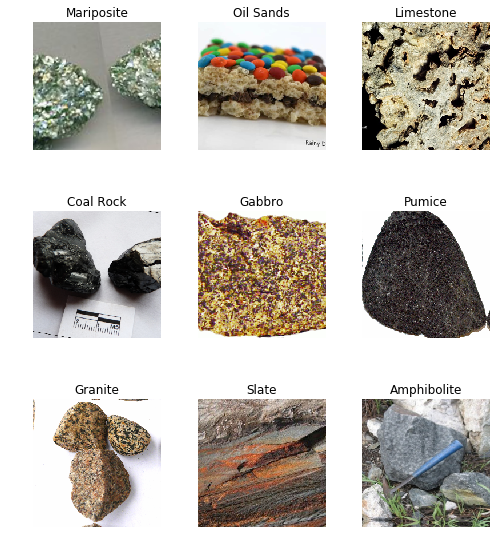

In [260]:
data.show_batch(rows=3, figsize=(7,8))

In [261]:
data.classes, data.c

(['Amphibolite',
  'Andesite',
  'Basalt',
  'Breccia',
  'Caliche',
  'Chert',
  'Coal Rock',
  'Conglomerate ',
  'Dacite',
  'Diatomite',
  'Diorite',
  'Dolomite',
  'Flint',
  'Gabbro',
  'Gneiss',
  'Granite',
  'Hornfels',
  'Iron Ore',
  'Lapis Lazuli',
  'Limestone',
  'Marble',
  'Mariposite',
  'Novaculite',
  'Obsidian',
  'Oil Sands',
  'Pegmatite',
  'Peridotite',
  'Phyllite',
  'Pumice',
  'Quartz',
  'Quartzite ',
  'Rhyolite',
  'Rock Salt',
  'Sandstone',
  'Schist',
  'Scoria',
  'Shale',
  'Siltstone',
  'Skarn',
  'Slate',
  'Soapstone ',
  'Tuff',
  'Unakite '],
 43)

## Train model

In [262]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [263]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [264]:
learn.fit_one_cycle(4)

Total time: 04:14
epoch  train_loss  valid_loss  error_rate
1      3.983701    3.260434    0.840756    (01:05)
2      3.374040    2.978882    0.794872    (01:03)
3      2.903262    2.906982    0.770580    (01:02)
4      2.557539    2.896995    0.769231    (01:02)



In [265]:
learn.save('stage-1-rocks')

In [266]:
learn.unfreeze()

In [267]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


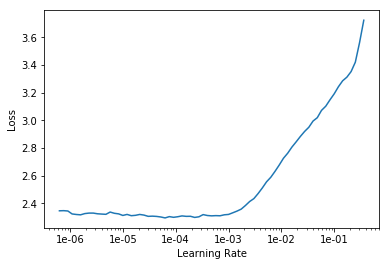

In [268]:
learn.recorder.plot()

In [269]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

Total time: 02:14
epoch  train_loss  valid_loss  error_rate
1      2.588884    3.014633    0.788124    (01:06)
2      2.310169    2.793107    0.738192    (01:07)



In [270]:
learn.save('stage-2-rocks')

In [271]:
learn.load('stage-2-rocks')

## Interpretation

In [272]:
interp = ClassificationInterpretation.from_learner(learn)

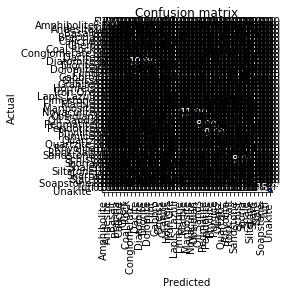

In [273]:
interp.plot_confusion_matrix()

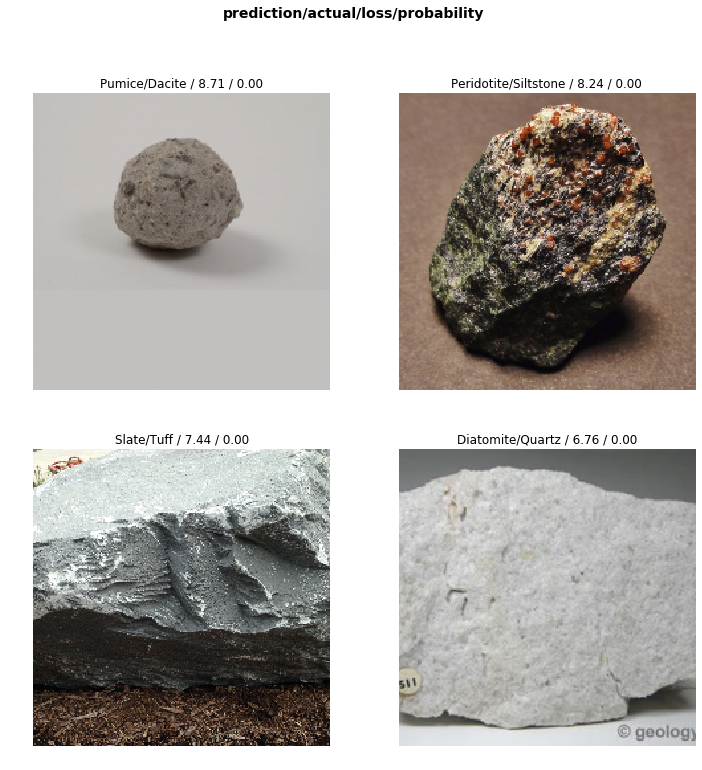

In [ ]:
interp.plot_top_losses(4)

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [237]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

Now we can pass in these paths to our widget.

In [238]:
fd = FileDeleter(file_paths=top_loss_paths)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

## Putting your model in production

In [239]:
data.classes

['Andesite', 'Basalt', 'Dacite', 'Quartz', 'Siltstone']

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [240]:
# fastai.defaults.device = torch.device('cpu')

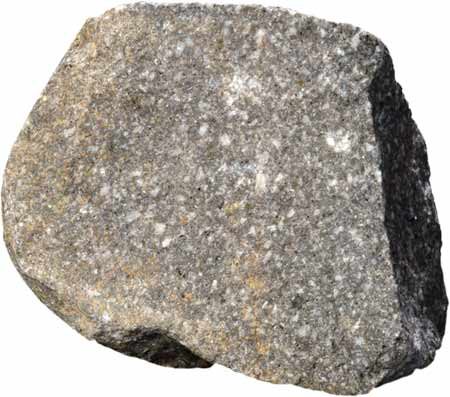

In [243]:
img = open_image(path/'Andesite'/'00000001.jpg')
img

In [246]:
data.classes

['Andesite', 'Basalt', 'Dacite', 'Quartz', 'Siltstone']

In [248]:
# classes = ['Andesite', 'Basalt', 'Dacite', 'Quartz', 'Siltstone']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2-containers')

In [249]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'Andesite'

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [88]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [87]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:12
epoch  train_loss  valid_loss  error_rate     
1      19.205343   80275072.000000  0.737179    (00:12)



### Learning rate (LR) too low

In [89]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [90]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:04
epoch  train_loss  valid_loss  error_rate
1      1.846892    1.460822    0.692308    (00:12)
2      1.822263    1.449666    0.685897    (00:12)
3      1.818573    1.452975    0.660256    (00:12)
4      1.806075    1.466667    0.653846    (00:13)
5      1.804038    1.476455    0.679487    (00:13)



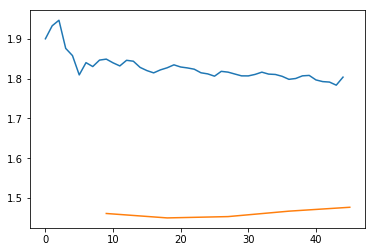

In [91]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [105]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [106]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      1.271487    0.711475    0.280255    (00:14)



### Too many epochs

In [107]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [108]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [111]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 07:22
epoch  train_loss  valid_loss  error_rate
1      1.517631    1.572828    0.802288    (00:12)
2      1.546593    1.550419    0.826797    (00:11)
3      1.545142    1.528509    0.815359    (00:11)
4      1.478895    1.492109    0.790850    (00:10)
5      1.433474    1.442667    0.728758    (00:10)
6      1.337803    1.386668    0.679739    (00:10)
7      1.270900    1.327418    0.642157    (00:11)
8      1.200847    1.269937    0.591503    (00:11)
9      1.121168    1.216577    0.545752    (00:10)
10     1.029964    1.176654    0.519608    (00:11)
11     0.959061    1.140666    0.488562    (00:11)
12     0.887489    1.114502    0.480392    (00:10)
13     0.824836    1.097068    0.470588    (00:10)
14     0.767771    1.091737    0.464052    (00:11)
15     0.717235    1.086249    0.465686    (00:11)
16     0.665047    1.078649    0.449346    (00:10)
17     0.620755    1.081273    0.446078    (00:11)
18     0.578923    1.082510    0.444444    (00:11)
19     0.551266    1.0